In [547]:
#Import Packages
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [548]:
#Import Data
seller_sales_data=pd.read_excel(r'D:\Amazon_Project\Python_Project\EDA_Amazon_Seller_Sales_Analysis\amazon_seller_order_sample_data.xlsx')

In [549]:
#let us understand the data!
seller_sales_data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [550]:
#include all will show the statistical properties of the numeric and non numeric columns both
seller_sales_data.describe(include='all')

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
count,171,171,171,171,171,171,171,171.000000,153,145,47,171
unique,171,171,149,81,30,54,61,NaN,18,13,1,2
top,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Geetika,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,NaN,₹449.00,₹84.96,Cash On Delivery,Delivered to buyer
freq,1,1,3,17,31,33,33,NaN,52,100,47,160
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087719,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445132,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [551]:
#There are 171 datapoints and 12 features
#order_no and date are unique
#One buyer made at most 3 orders
#City,state, sku and description need further analysis
#The ordered quantity is at most 4 but median is 1
#Item_total and shipping_fee should be converted to float
#Cash on delivery has only 1 value, so it seems like boolean
#Order status is target variable, and has 2 classes.

In [552]:
#getting the metadata information of the data
seller_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [553]:
list_of_column_with_missing_data = []

for column_with_missing_data in seller_sales_data.columns:
    if(seller_sales_data[column_with_missing_data].isnull().sum()>0):
        list_of_column_with_missing_data.append(column_with_missing_data)

        list_of_column_with_missing_data

In [554]:
#item_total, shipping_fee and cod has missing values, we should deal with them
#Order_data should be date dtype
#Item_total and Shipping_fee should be float or int
#COD should be boolean
#Order_status is also should be boolean

In [555]:
#Data Cleaning
seller_sales_data["order_date"]= pd.to_datetime(seller_sales_data['order_date'])
seller_sales_data["order_year"]=seller_sales_data["order_date"].dt.year
seller_sales_data["order_month"]=seller_sales_data["order_date"].dt.month
seller_sales_data['order_week'] = seller_sales_data['order_date'].dt.week
seller_sales_data["order_day"]=seller_sales_data["order_date"].dt.day

seller_sales_data['order_weekday'] = seller_sales_data['order_date'].dt.weekday

seller_sales_data['order_time'] = seller_sales_data['order_date'].dt.time
seller_sales_data['order_date_extracted'] = seller_sales_data['order_date'].dt.date

seller_sales_data.drop("order_date",axis=1,inplace=True)

In [556]:
locations = ['ship_city', 'ship_state']
for i in locations:
    seller_sales_data[i] = seller_sales_data[i].str.replace("[^A-Z a-z]","")
    seller_sales_data[i] = seller_sales_data[i].str.upper()
seller_sales_data


,order_no,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_year,order_month,order_week,order_day,order_weekday,order_time,order_date_extracted
0,405-9763961-5211537,Mr.,CHANDIGARH,CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer,2021,7,28,18,6,22:38:00,2021-07-18
1,404-3964908-7850720,Minam,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer,2021,10,42,19,1,18:05:00,2021-10-19
2,171-8103182-4289117,yatipertin,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer,2021,11,47,28,6,22:20:00,2021-11-28
3,405-3171677-9557154,aciya,DEVARAKONDA,TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer,2021,7,30,28,2,04:06:00,2021-07-28
4,402-8910771-1215552,Susmita,MUMBAI,MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer,2021,9,39,28,1,14:50:00,2021-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,Shahin,MUMBAI,MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹1,347.00",₹84.96,Cash On Delivery,Delivered to buyer,2021,12,50,13,0,11:30:00,2021-12-13
167,402-3045457-5360311,Sharmistha,DEHRADUN,UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹114.46,NaN,Delivered to buyer,2021,12,48,1,2,12:18:00,2021-12-01
168,408-2260162-8323567,shashank,DURG,CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹105.02,NaN,Delivered to buyer,2021,12,49,9,3,18:55:00,2021-12-09
169,403-5664951-8941100,Jayeta,KOLKATA,WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹1,499.00",₹80.24,Cash On Delivery,Delivered to buyer,2022,2,8,23,2,00:43:00,2022-02-23


In [557]:
seller_sales_data["buyer"]= seller_sales_data["buyer"].str.upper()

In [558]:
seller_sales_data["sku"] = seller_sales_data["sku"].apply(lambda x: x[5:])
seller_sales_data["sku"]=seller_sales_data["sku"].str.replace('[^0-9 A-Z a-z]',"")
seller_sales_data

,order_no,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_year,order_month,order_week,order_day,order_weekday,order_time,order_date_extracted
0,405-9763961-5211537,MR.,CHANDIGARH,CHANDIGARH,2X3C0FKNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer,2021,7,28,18,6,22:38:00,2021-07-18
1,404-3964908-7850720,MINAM,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer,2021,10,42,19,1,18:05:00,2021-10-19
2,171-8103182-4289117,YATIPERTIN,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer,2021,11,47,28,6,22:20:00,2021-11-28
3,405-3171677-9557154,ACIYA,DEVARAKONDA,TELANGANA,AHJ3AOR7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer,2021,7,30,28,2,04:06:00,2021-07-28
4,402-8910771-1215552,SUSMITA,MUMBAI,MAHARASHTRA,KL7WAAZ82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer,2021,9,39,28,1,14:50:00,2021-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,SHAHIN,MUMBAI,MAHARASHTRA,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹1,347.00",₹84.96,Cash On Delivery,Delivered to buyer,2021,12,50,13,0,11:30:00,2021-12-13
167,402-3045457-5360311,SHARMISTHA,DEHRADUN,UTTARAKHAND,SBWDQNSDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹114.46,NaN,Delivered to buyer,2021,12,48,1,2,12:18:00,2021-12-01
168,408-2260162-8323567,SHASHANK,DURG,CHHATTISGARH,SBWDQNSDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹105.02,NaN,Delivered to buyer,2021,12,49,9,3,18:55:00,2021-12-09
169,403-5664951-8941100,JAYETA,KOLKATA,WEST BENGAL,N8YFZFP74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹1,499.00",₹80.24,Cash On Delivery,Delivered to buyer,2022,2,8,23,2,00:43:00,2022-02-23


In [559]:
# convert string NaN to NP NAN, remove rupee symbol and commas from amount features
amounts = ['item_total', 'shipping_fee']
for i in amounts:
    seller_sales_data[i]=  seller_sales_data[i].replace("NaN", np.NAN)
    seller_sales_data[i]=  seller_sales_data[i].str.replace("[^0-9.]","")
    seller_sales_data[i]=  seller_sales_data[i].replace(np.NAN, 0.00)
    seller_sales_data[i]=pd.to_numeric(seller_sales_data[i])

In [560]:
#Data Imputation/Finding outliars
#The method of payment should be cash on delivery otherwise online.
seller_sales_data["cod"].fillna("Online",inplace=True)

<AxesSubplot:xlabel='shipping_fee'>

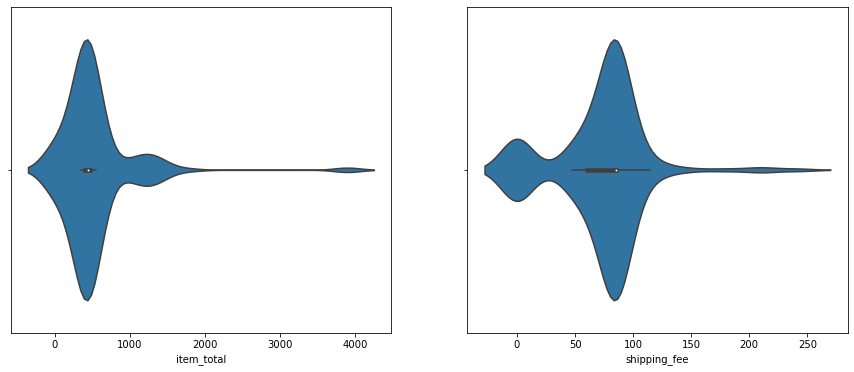

In [561]:
#There are still some null values in item_total and shipping_fee

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.violinplot(x=seller_sales_data.item_total)
plt.subplot(1,2,2)
sns.violinplot(x=seller_sales_data.shipping_fee)

In [562]:
#The data is right skewed and there are some outliers.
#We should use median instead of mean by doing imputation.
#Median will be less prone to outliers.

#Exploratory Analysis of Data
seller_sales_data.describe(include="all")

,order_no,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_year,order_month,order_week,order_day,order_weekday,order_time,order_date_extracted
count,171,171,171,171,171,171,171.000000,171.000000,171.000000,171,171,171.000000,171.000000,171.000000,171.000000,171.000000,171,171
unique,171,147,74,26,54,61,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,154,117
top,405-9763961-5211537,GEETIKA,MUMBAI,MAHARASHTRA,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,NaN,NaN,NaN,Online,Delivered to buyer,NaN,NaN,NaN,NaN,NaN,20:53:00,2021-12-04
freq,1,3,20,32,33,33,NaN,NaN,NaN,124,160,NaN,NaN,NaN,NaN,NaN,2,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.087719,521.502924,71.862690,NaN,NaN,2021.187135,8.426901,35.058480,15.561404,3.052632,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.445132,495.177002,39.103857,NaN,NaN,0.391165,3.746242,15.763214,8.989571,1.997832,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,2021.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,399.000000,60.180000,NaN,NaN,2021.000000,7.000000,30.000000,8.500000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,449.000000,84.960000,NaN,NaN,2021.000000,10.000000,40.000000,16.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,475.000000,84.960000,NaN,NaN,2021.000000,11.000000,47.000000,23.000000,5.000000,NaN,NaN


<AxesSubplot:title={'center':'total quantity of sales by states'}, xlabel='quantity', ylabel='ship_state'>

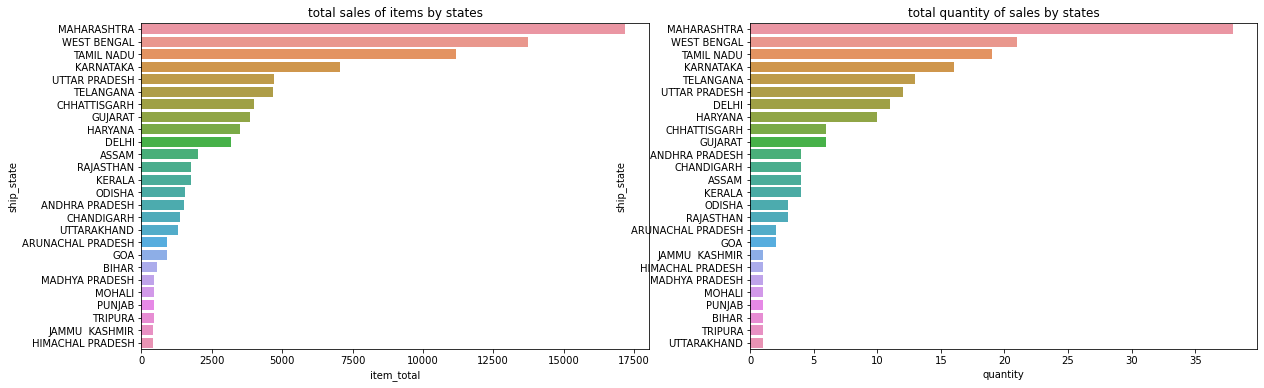

In [563]:
#Sales based on cities and states
plt.figure(figsize=(20,6))

ax1 = plt.subplot(1, 2, 1)
plt.title("total sales of items by states")
data_ship_state=seller_sales_data.groupby("ship_state").agg({"item_total" : "sum"}).sort_values("item_total",ascending = False)
sns.barplot(x=data_ship_state["item_total"],y=data_ship_state.index)

ax2 = plt.subplot(1,2,2)
plt.title("total quantity of sales by states")
data_ship_state=seller_sales_data.groupby("ship_state").agg({"quantity" : "sum"}).sort_values("quantity",ascending=False)
sns.barplot(x=data_ship_state["quantity"],y=data_ship_state.index)

In [564]:
#Item_total: Top 5 States : Uttar Pradesh, Mahasrashtra, West Bengal, Tamil Nadu, and Karnataka 
#Total Quantity of States: Top 5 cities Mahasrashtra, West Bengal, Tamil Nadu, Karnataka and Telangana
#The two charts are almost alike which is normal, more quantity of item yields more sales (Item_total)

In [565]:
seller_sales_data.head(5)

,order_no,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_year,order_month,order_week,order_day,order_weekday,order_time,order_date_extracted
0,405-9763961-5211537,MR.,CHANDIGARH,CHANDIGARH,2X3C0FKNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,0.00,Online,Delivered to buyer,2021,7,28,18,6,22:38:00,2021-07-18
1,404-3964908-7850720,MINAM,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online,Delivered to buyer,2021,10,42,19,1,18:05:00,2021-10-19
2,171-8103182-4289117,YATIPERTIN,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,Online,Delivered to buyer,2021,11,47,28,6,22:20:00,2021-11-28
3,405-3171677-9557154,ACIYA,DEVARAKONDA,TELANGANA,AHJ3AOR7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,0.0,0.00,Cash On Delivery,Delivered to buyer,2021,7,30,28,2,04:06:00,2021-07-28
4,402-8910771-1215552,SUSMITA,MUMBAI,MAHARASHTRA,KL7WAAZ82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,Online,Delivered to buyer,2021,9,39,28,1,14:50:00,2021-09-28


In [566]:
#Sales vs Payment Method and Returned to Seller
sales_payment_order_status=seller_sales_data[['cod', 'order_status', 'item_total']].groupby(['cod', 'order_status']).sum().reset_index()
sales_payment_order_status

,cod,order_status,item_total
0,Cash On Delivery,Delivered to buyer,22914.0
1,Cash On Delivery,Returned to seller,0.0
2,Online,Delivered to buyer,66263.0
3,Online,Returned to seller,0.0


<AxesSubplot:xlabel='cod', ylabel='item_total'>

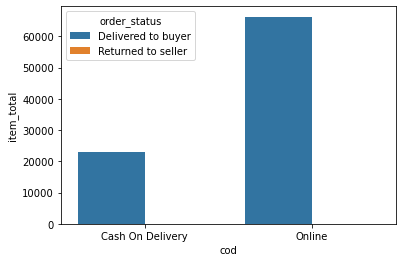

In [567]:
sns.barplot(data=sales_payment_order_status,x="cod",y="item_total",hue="order_status")

In [568]:
print("The percentage of returned to seller for Online Sales")
returned_to_seller_for_online_sales = sales_payment_order_status.loc[3,"item_total"]/sales_payment_order_status.loc[2,"item_total"]*100
print(f"{returned_to_seller_for_online_sales} %")
print("The percentage of returned to seller for Cash on Delivery")
returned_to_seller_for_cash_sales = sales_payment_order_status.loc[1,"item_total"]/sales_payment_order_status.loc[0,"item_total"]*100
print(f"{returned_to_seller_for_cash_sales} %")

The percentage of returned to seller for Online Sales
0.0 %
The percentage of returned to seller for Cash on Delivery
0.0 %


In [569]:
#Online payment is almost 3 times as big as cash on delivery payment method.
#Cash on delivery payment method has "Returned to seller" almost 3 times as big as online payment
#We may consider promotion for online payment method.

In [570]:
#Payment Method vs Shipping Fee
payment_vs_shipping_fee = seller_sales_data[['cod', 'shipping_fee','quantity']].groupby(['cod']).sum().reset_index()
payment_vs_shipping_fee["fee per quantity"]= payment_vs_shipping_fee["shipping_fee"]/payment_vs_shipping_fee["quantity"]
payment_vs_shipping_fee

,cod,shipping_fee,quantity,fee per quantity
0,Cash On Delivery,3055.02,49,62.347347
1,Online,9233.50,137,67.397810


In [571]:
#The fee per quantity of payment methods almost the same. (2 $ difference is negligible.)
#Maybe we should consider decreasing the of for shipping with online payment Or increasing fee of shipping with cash on delivery

In [572]:
#Sales over Dates
sales_over_dates = seller_sales_data.groupby(["order_year","order_month"]).aggregate({"item_total":"sum"}).reset_index().sort_values(by=["order_year","order_month"])
sales_over_dates

,order_year,order_month,item_total
0,2021,6,1698.0
1,2021,7,2395.0
2,2021,8,7640.0
3,2021,9,9084.0
4,2021,10,10979.0
5,2021,11,13672.0
6,2021,12,28983.0
7,2022,1,7013.0
8,2022,2,7713.0


Text(0.5, 1.0, 'Sales vs Year')

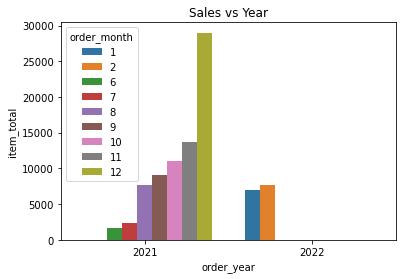

In [573]:
sns.barplot(data = sales_over_dates, x="order_year", y="item_total",hue="order_month")
plt.title("Sales vs Year")

In [574]:
#Sales(item_total) increases in 2021, there is an increasing trend
#After 2021 the sales are dropped, maybe people made too much expenditure at the end of the year.

Text(0.5, 1.0, 'Sales over years with order_status differentiation')

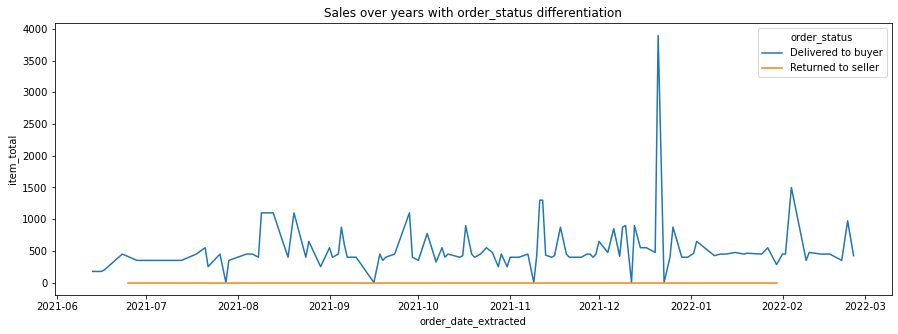

In [575]:
plt.figure(figsize=(15,5))

lp = sns.lineplot(data=seller_sales_data,x="order_date_extracted",y="item_total",hue="order_status",markers=True,ci=0)
plt.title("Sales over years with order_status differentiation")

In [576]:
#The sales in December is quite high, the reason might be the Christmas.
#The returned to seller order status does not change much with date.

Text(0.5, 1.0, 'Sales in December 2021')

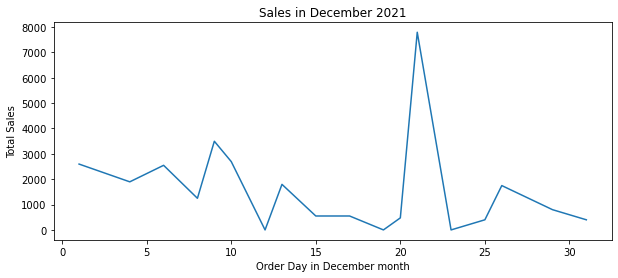

In [578]:
date_december=seller_sales_data[seller_sales_data.order_month==12].groupby(["order_day"]).aggregate({"item_total":"sum"}).reset_index()
date_december

plt.figure(figsize=(10,4))

lp = sns.lineplot(data=date_december,x="order_day",y="item_total")

plt.ylabel('Total Sales')

plt.xlabel('Order Day in December month')

plt.title("Sales in December 2021")

In [579]:
#As I thought, sales increased due to Christmas.

In [580]:
#Correlation Analysis
seller_sales_data["cod"]=seller_sales_data["cod"].map({"Online": 0, "Cash On Delivery":1})
seller_sales_data["order_status"]=seller_sales_data["order_status"].map({"Returned to seller": 0, "Delivered to buyer":1})

<AxesSubplot:>

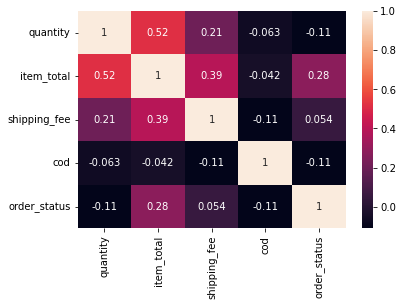

In [581]:
feature_of_interest=["quantity","item_total","shipping_fee","cod","order_status"]
sns.heatmap(seller_sales_data[feature_of_interest].corr(),annot=True)

In [582]:
#Item_total and Quantity has medium positive correlation
#Shipping_fee and Item_total has medium positive correlation
#There is no any other signigicant correlations.
#Item total vs Quantity and Item total vs Shipping Fee correlation is as expected. The number of quantity and shipping fee increases with sales.

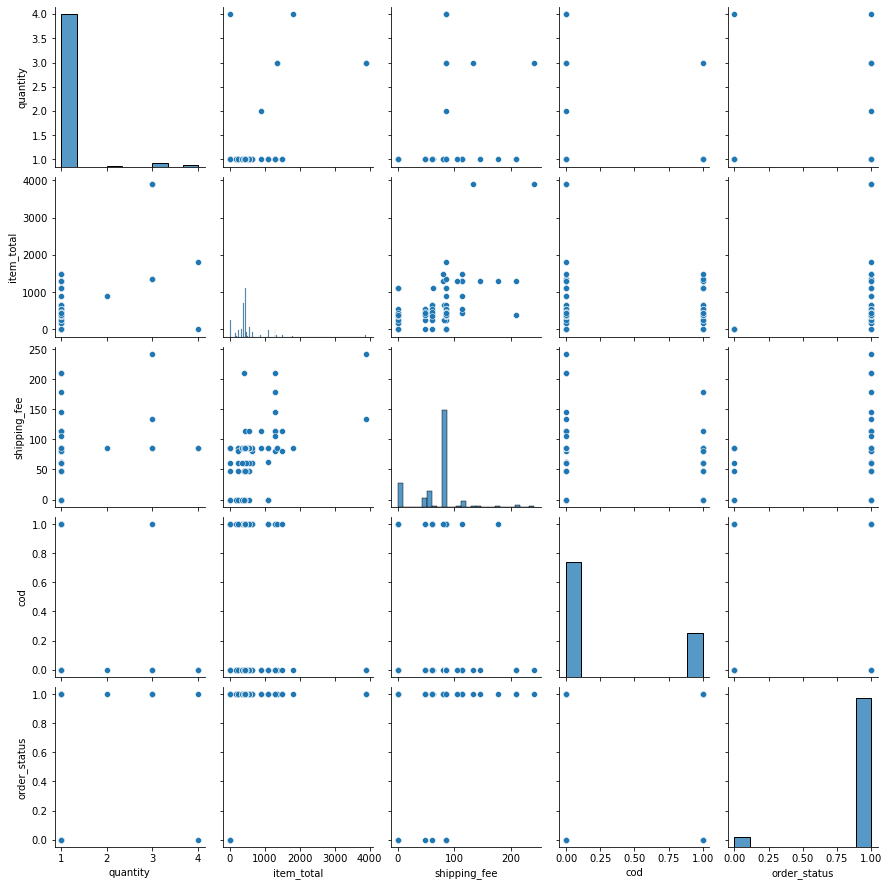

In [583]:
sns.pairplot(seller_sales_data[feature_of_interest])

In [584]:
#Paitplots do not show linear relationship with order_status

In [585]:
seller_sales_data.head(5)

,order_no,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,order_year,order_month,order_week,order_day,order_weekday,order_time,order_date_extracted
0,405-9763961-5211537,MR.,CHANDIGARH,CHANDIGARH,2X3C0FKNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,0.00,0,1,2021,7,28,18,6,22:38:00,2021-07-18
1,404-3964908-7850720,MINAM,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,0,1,2021,10,42,19,1,18:05:00,2021-10-19
2,171-8103182-4289117,YATIPERTIN,PASIGHAT,ARUNACHAL PRADESH,DN0WDXVYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,0,1,2021,11,47,28,6,22:20:00,2021-11-28
3,405-3171677-9557154,ACIYA,DEVARAKONDA,TELANGANA,AHJ3AOR7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,0.0,0.00,1,1,2021,7,30,28,2,04:06:00,2021-07-28
4,402-8910771-1215552,SUSMITA,MUMBAI,MAHARASHTRA,KL7WAAZ82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,0,1,2021,9,39,28,1,14:50:00,2021-09-28
